KHAI BÁO THƯ VIỆN PANDAS

In [1]:
import pandas as pd
import numpy as np


KHAI BÁO DỮ LIỆU

In [2]:
data = pd.read_csv('diabetes.csv')


IN THỬ DỮ LIỆU

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


ĐẾM SỐ HÀNG VÀ SỐ CỘT CỦA DỮ LIỆU

In [4]:
data.shape

(768, 9)

describe data

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ĐẾM SỐ CỘT NULL

In [6]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Insulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


Xử lý giá trị NULL bằng cách thay thế null với giá trị trung bình
note:
most_frequent : xuất hiện nhiều nhất
mean, trung bình    

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=0)
imputer = imputer.fit(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])



ghi dữ liệu ra file

In [8]:
data.to_csv("output.csv", index=False)  # Không lưu cột chỉ số (index)


check lại giá trị các cột

In [9]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


đếm số dữ liệu data bị bệnh và không bị bệnh

In [10]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

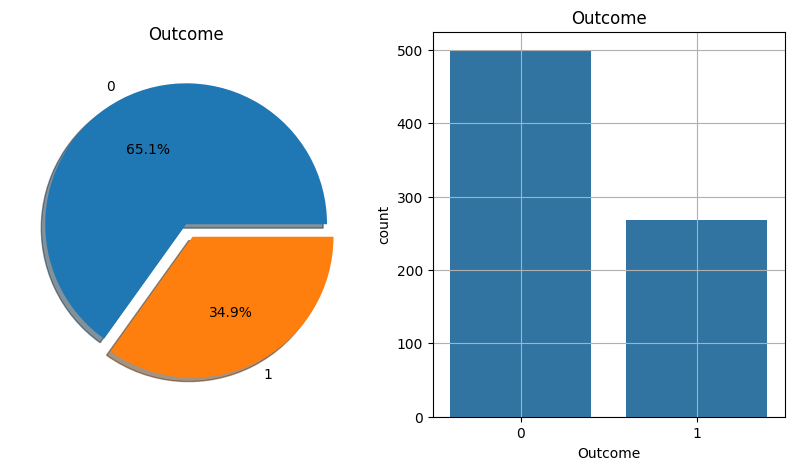

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

# outcome
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=data, ax=ax[1])
ax[1].set_title('Outcome')
N, P = data['Outcome'].value_counts()



plt.grid()
plt.show()

CHIA TẬP DỮ LIỆU RA: 80% train 20% test

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Outcome', axis=1) #tập giá trị
Y = data['Outcome'] # tập kết quả
x_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Đánh giá mức độ tương quan của từng cột ảnh hưởng tới kết quả cuối cùng
Giá trị lớn hơn 0: Đặc trưng có sự phụ thuộc (đóng góp thông tin) vào biến mục tiêu. Giá trị càng lớn, đặc trưng càng quan trọng.
Giá trị bằng 0: Đặc trưng không có mối quan hệ với biến mục tiêu hoặc không đóng góp thông tin.

In [13]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train, random_state = 0)
mutual_info

array([0.01555395, 0.11358017, 0.02420075, 0.00523363, 0.0200378 ,
       0.07666446, 0.        , 0.04601336])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.113580
BMI                         0.076664
Age                         0.046013
BloodPressure               0.024201
Insulin                     0.020038
Pregnancies                 0.015554
SkinThickness               0.005234
DiabetesPedigreeFunction    0.000000
dtype: float64

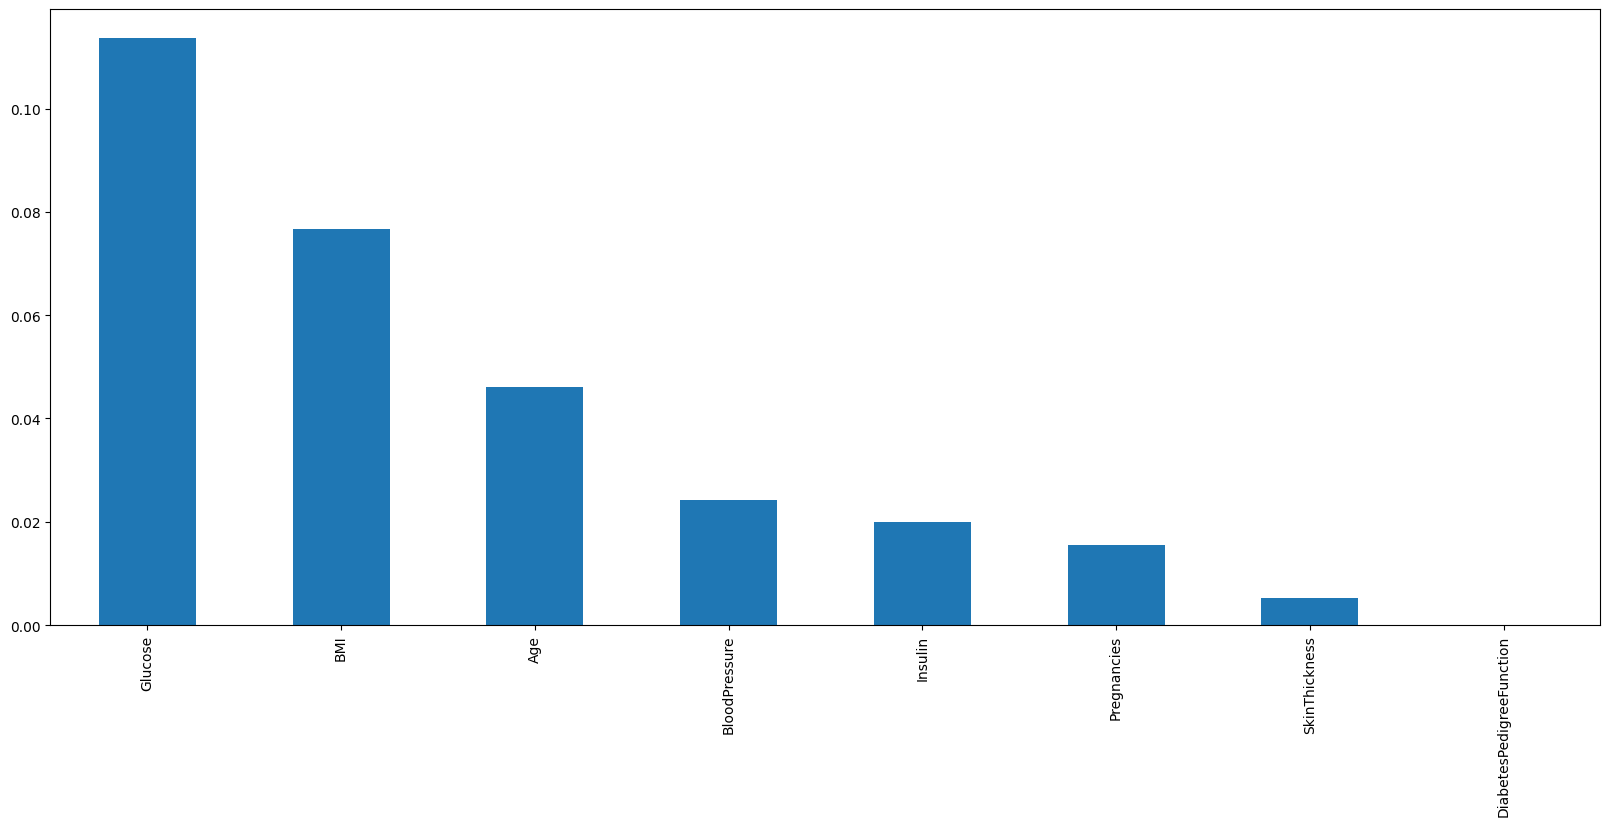

In [15]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

Vì yếu tố ảnh hưởng của lịch sử gia đình ảnh hưởng ít tới kết quả => loại bỏ để tối ưu thuật toán

In [16]:
data.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,50,1
1,1,85.0,66.0,29.0,105.0,26.6,31,0
2,8,183.0,64.0,32.0,105.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1


đếm số 0/1 của tập smote là tập train của bài toán

In [17]:
y_train.value_counts()


Outcome
0    393
1    221
Name: count, dtype: int64

cân bằng dữ liệu với SMOTE


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(x_train, y_train)

np.bincount(y_smote)

array([393, 393])

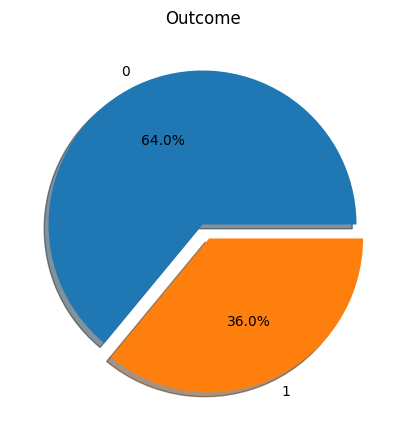

In [19]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))  # Chỉ một biểu đồ
y_train.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()


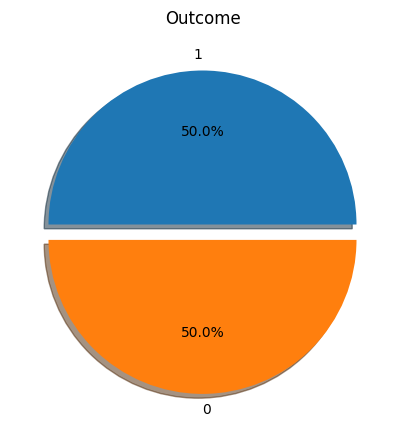

In [20]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))  # Chỉ một biểu đồ
y_smote.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()


# **Decision tree**

Tạo ra cây với các tầng khác nhau, sau đó huấn luyện mô hình tại từng tầng và kiểm tra độ chính xác tại mỗi tầng
Phân tích ảnh hưởng của tham số max_depth đến độ chính xác của mô hình trên tập huấn luyện và kiểm tra.

Depth =  2 , Training Accuracy =  0.7493638676844784 , Test Accuracy =  0.7402597402597403 , Diff =  0.9104127424738095  %
Depth =  3 , Training Accuracy =  0.7646310432569975 , Test Accuracy =  0.6883116883116883 , Diff =  7.631935494530917  %
Depth =  4 , Training Accuracy =  0.8040712468193384 , Test Accuracy =  0.7402597402597403 , Diff =  6.381150655959811  %
Depth =  5 , Training Accuracy =  0.8269720101781171 , Test Accuracy =  0.7402597402597403 , Diff =  8.671226991837678  %
Depth =  6 , Training Accuracy =  0.8447837150127226 , Test Accuracy =  0.7337662337662337 , Diff =  11.101748124648891  %
Depth =  7 , Training Accuracy =  0.8753180661577609 , Test Accuracy =  0.7207792207792207 , Diff =  15.453884537854012  %
Depth =  8 , Training Accuracy =  0.8931297709923665 , Test Accuracy =  0.7142857142857143 , Diff =  17.884405670665217  %
Depth =  9 , Training Accuracy =  0.9211195928753181 , Test Accuracy =  0.7077922077922078 , Diff =  21.33273850831103  %
Depth =  10 , Traini

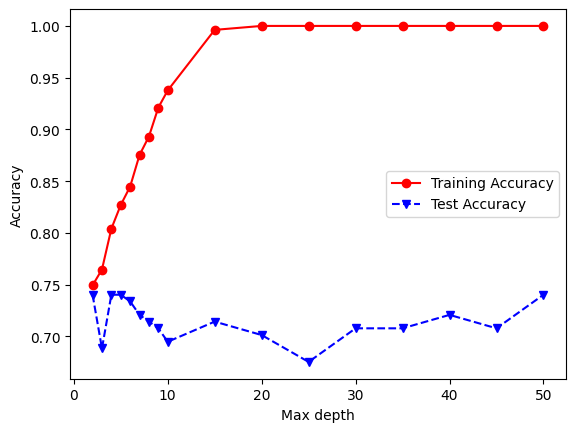

In [21]:
from sklearn import tree
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

Tạo một cây quyết định với độ sâu tối đa là 2 và huấn luyện nó bằng dữ liệu đã được cung cấp 

In [22]:
from sklearn.tree import DecisionTreeClassifier

# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

Kiểm tra độ chính xác training và test của thuật toán.

In [23]:
from sklearn.metrics import classification_report

# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7493638676844784
Testing Accuracy is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.57      0.57      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



Kiểm tra chéo mô hình

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)

tính toán và hiển thị độ chính xác trung bình (mean accuracy) và độ lệch chuẩn (standard deviation) của mô hình dựa trên kết quả kiểm tra chéo 

In [25]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7357015533486122 +/- 0.012208077742788486


# **Bagging Decision tree**

In [26]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [27]:
from sklearn.metrics import confusion_matrix

y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[84 23]
 [ 6 41]]
Accuracy Score 0.8116883116883117
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       107
           1       0.64      0.87      0.74        47

    accuracy                           0.81       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.84      0.81      0.82       154



In [28]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [29]:
cv_score

array([0.74675325, 0.71428571, 0.75324675, 0.82352941, 0.73856209])

In [30]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7552754435107376 +/- 0.03659191616037781


#  **Grid search on svm**



MinMaxScaler: thu hẹp khoảng giá trị lại

In [31]:
from sklearn.preprocessing import MinMaxScaler

# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_smote[cols_to_scale])
X_smote[cols_to_scale] = scaler.transform(X_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.790 total time=   0.0s


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.497 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.497 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.497 total time=   0.0s
[CV 5/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=100, gamma=1)

In [34]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[82 25]
 [11 36]]
Accuracy Score 0.7662337662337663
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       107
           1       0.59      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.79      0.77      0.77       154



**K-fold cross validation(SVM)**

In [35]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [36]:
cv_score

array([0.74025974, 0.70779221, 0.74675325, 0.79084967, 0.77124183])

In [37]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7513793396146337 +/- 0.028274759224201026


# **Logistic** **Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_iter': [10000],
    'warm_start': [False, True],
    'penalty': ['l1', 'l2'],  # elasticnet chỉ dùng với saga
    'solver': ['liblinear', 'saga'],  # Cả hai đều hỗ trợ l1 và l2
}


lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [39]:
lr_bestgrid=lr_grid.best_estimator_

In [40]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[82 25]
 [11 36]]
Accuracy Score 0.7662337662337663
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       107
           1       0.59      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.79      0.77      0.77       154



**Logistic regression K fold**

In [41]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7018419489007724 +/- 0.02042062941643016


# **Gausien Naive Bays**


In [42]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [43]:
gs_NB.best_params_

{'var_smoothing': np.float64(0.2848035868435802)}

In [44]:
gs_NB=gs_NB.best_estimator_

In [45]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[89 18]
 [14 33]]
Accuracy Score 0.7922077922077922
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       107
           1       0.65      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



In [46]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7526525761819879 +/- 0.020025654269566096



# **Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [48]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[87 20]
 [ 7 40]]
Accuracy Score 0.8246753246753247
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       107
           1       0.67      0.85      0.75        47

    accuracy                           0.82       154
   macro avg       0.80      0.83      0.81       154
weighted avg       0.85      0.82      0.83       154



In [49]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7552669552669553 +/- 0.03596071902543236


# **XG Boost**

In [50]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [51]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[84 23]
 [ 9 38]]
Accuracy Score 0.7922077922077922
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       107
           1       0.62      0.81      0.70        47

    accuracy                           0.79       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.82      0.79      0.80       154



In [52]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7500636618283677 +/- 0.02561478580102637


# **Ada Boost**

In [53]:
from sklearn.ensemble import AdaBoostClassifier


# Khởi tạo mô hình cơ sở

# Tạo AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, estimator=rf, learning_rate=1)

# Huấn luyện mô hình
abc.fit(X_smote, y_smote)

# Dự đoán và in báo cáo kết quả
print(classification_report(y_test, abc.predict(X_test)))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       107
           1       0.64      0.79      0.70        47

    accuracy                           0.80       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.80      0.80       154



In [54]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

Results =  0.7565911212970037 +/- 0.044893176263911636


# **KNN**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7727272727272727
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       107
           1       0.59      0.81      0.68        47

    accuracy                           0.77       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.81      0.77      0.78       154



In [56]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

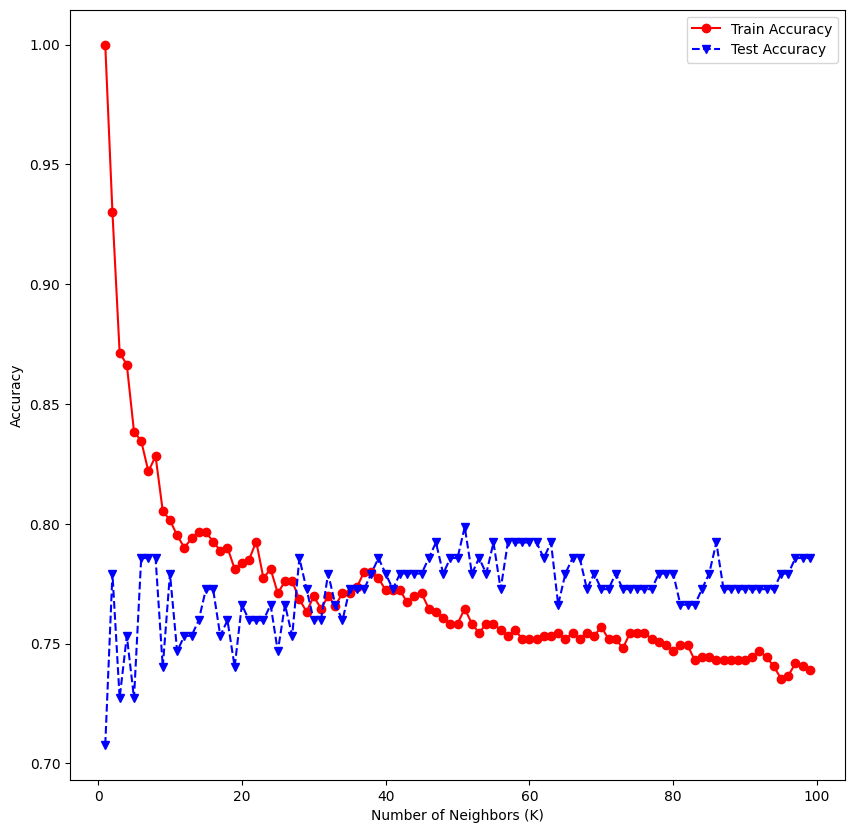

In [57]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [58]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7077922077922078 Difference =  29.220779220779225 %
Number of neighbors =  2 Train accuracy =  0.9300254452926209 Test Accuracy =  0.7792207792207793 Difference =  15.080466607184162 %
Number of neighbors =  3 Train accuracy =  0.871501272264631 Test Accuracy =  0.7272727272727273 Difference =  14.422854499190374 %
Number of neighbors =  4 Train accuracy =  0.8664122137404581 Test Accuracy =  0.7532467532467533 Difference =  11.31654604937048 %
Number of neighbors =  5 Train accuracy =  0.8384223918575063 Test Accuracy =  0.7272727272727273 Difference =  11.114966458477904 %
Number of neighbors =  6 Train accuracy =  0.8346055979643766 Test Accuracy =  0.7857142857142857 Difference =  4.889131225009091 %
Number of neighbors =  7 Train accuracy =  0.821882951653944 Test Accuracy =  0.7857142857142857 Difference =  3.6168665939658284 %
Number of neighbors =  8 Train accuracy =  0.8282442748091603 Test Accuracy =  0.7857142

In [59]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [60]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [61]:
knn_bestgrid=knn_grid.best_estimator_

In [62]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [63]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[80 27]
 [ 7 40]]
Accuracy Score 0.7792207792207793
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       107
           1       0.60      0.85      0.70        47

    accuracy                           0.78       154
   macro avg       0.76      0.80      0.76       154
weighted avg       0.82      0.78      0.79       154



In [64]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7409897292250234 +/- 0.043623721705828476


# **Soft Voting**

In [65]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Danh sách các mô hình
estimators = []
estimators.append(('RF', RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimators.append(('SVC', SVC(C=100, gamma=0.1, probability=True)))
estimators.append(('ABC', AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1)))
estimators.append(('Bag', BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)))

# Voting Classifier với soft voting
Hyper_vot_soft = VotingClassifier(estimators=estimators, voting='soft')

# Huấn luyện mô hình
Hyper_vot_soft.fit(X_smote, y_smote)

# Dự đoán và đánh giá
y_pred = Hyper_vot_soft.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score: %f" % score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Soft Voting Score: 0.818182
[[85 22]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       107
           1       0.65      0.87      0.75        47

    accuracy                           0.82       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.85      0.82      0.82       154



In [66]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

Results =  0.7565656565656566 +/- 0.024753244144640824


## **ZeroR**


In [67]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

Train Accuracy:  0.5
Test Accuracy:  0.6948051948051948


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [68]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

## **Auc Curve**

In [69]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [70]:
final_roc_auc = []

In [71]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [72]:
from sklearn.metrics import roc_curve

# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [73]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.8780075561741897
roc_auc_score for KNN Classifier:  0.8888447007357327
roc_auc_score for SVM Classifier:  0.8796977530324119
roc_auc_score for Random Forest Classifier:  0.8774110161065818
roc_auc_score for Naive Bays Classifier:  0.8757208192483595
roc_auc_score for Ada Boost Classifier:  0.8761185126267648
roc_auc_score for XG Boost Classifier:  0.8574269238417181
roc_auc_score for Logistic Regression:  0.8779081328295885
roc_auc_score for Voting Classifier:  0.8874527739113144
roc_auc_score for DecisionTree:  0.7285742692384172


In [74]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

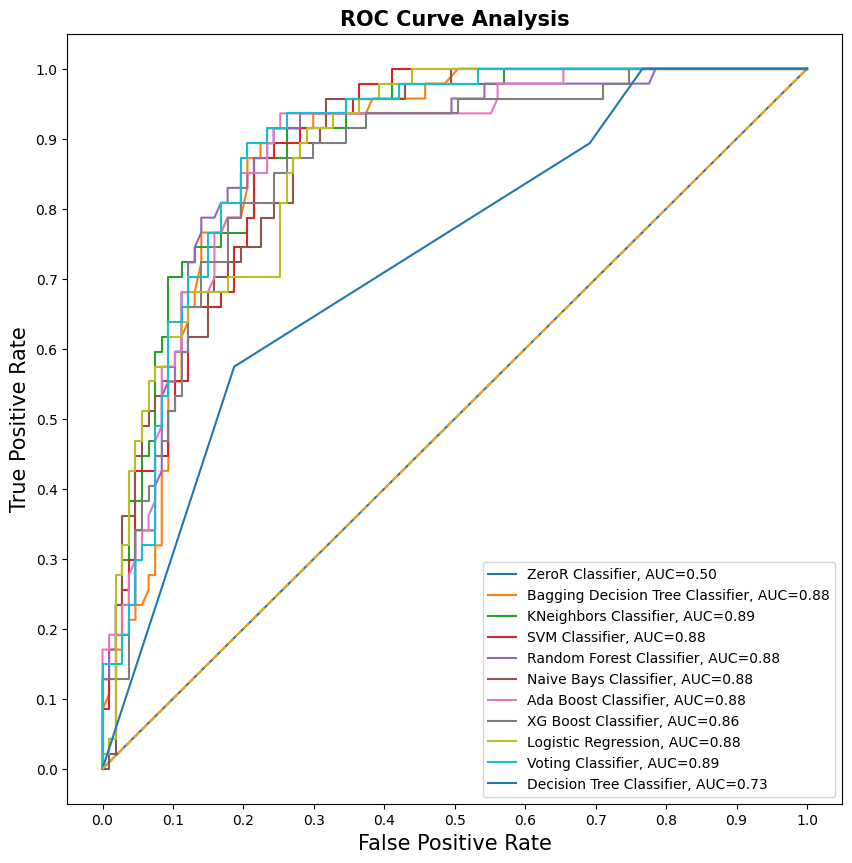

In [75]:
    fig = plt.figure(figsize=(10,10))

    for m in final_roc_auc:
        plt.plot(m['fpr'], 
                m['tpr'], 
                label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
        
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':10}, loc='lower right')

    plt.show()